# Pokemon Analysis

In [1]:
!pip install kneed

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
#import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [3]:
#import dataset
poke = pd.read_csv("/kaggle/input/pokemon-type-matchup-data/PokeTypeMatchupData.csv")
print(poke.head())

         Name Number Normal  Fire Water Electric  Grass   Ice Fighting Poison  \
0   Bulbasaur   #001     *1    *2  *0.5     *0.5  *0.25    *2     *0.5     *1   
1     Ivysaur   #002     *1    *2  *0.5     *0.5  *0.25    *2     *0.5     *1   
2    Venusaur   #003     *1    *2  *0.5     *0.5  *0.25    *2     *0.5     *1   
3  Charmander   #004     *1  *0.5    *2       *1   *0.5  *0.5       *1     *1   
4  Charmeleon   #005     *1  *0.5    *2       *1   *0.5  *0.5       *1     *1   

  Ground Flying Psychic   Bug Rock Ghost Dragon Dark Steel Fairy  
0     *1     *2      *2    *1   *1    *1     *1   *1    *1  *0.5  
1     *1     *2      *2    *1   *1    *1     *1   *1    *1  *0.5  
2     *1     *2      *2    *1   *1    *1     *1   *1    *1  *0.5  
3     *2     *1      *1  *0.5   *2    *1     *1   *1  *0.5  *0.5  
4     *2     *1      *1  *0.5   *2    *1     *1   *1  *0.5  *0.5  


In [4]:
#define variables
n=len(poke)
unique_type_combos = 154
numeric_columns = poke.columns.drop(['Name'])
poke_type_columns = numeric_columns.drop(['Number'])

In [5]:
print(numeric_columns)
print(type(poke["Normal"][0]))

Index(['Number', 'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice',
       'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock',
       'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'],
      dtype='object')
<class 'str'>


In [6]:
#takeout the first position of each value of each field 
#and convert each to a float type
for name in numeric_columns:
    for i in range(0,n):
        poke[name][i] = float(poke[name][i][1:])

In [7]:
print(poke.head())

         Name Number Normal Fire Water Electric Grass  Ice Fighting Poison  \
0   Bulbasaur      1      1    2   0.5      0.5  0.25    2      0.5      1   
1     Ivysaur      2      1    2   0.5      0.5  0.25    2      0.5      1   
2    Venusaur      3      1    2   0.5      0.5  0.25    2      0.5      1   
3  Charmander      4      1  0.5     2        1   0.5  0.5        1      1   
4  Charmeleon      5      1  0.5     2        1   0.5  0.5        1      1   

  Ground Flying Psychic  Bug Rock Ghost Dragon Dark Steel Fairy  
0      1      2       2    1    1     1      1    1     1   0.5  
1      1      2       2    1    1     1      1    1     1   0.5  
2      1      2       2    1    1     1      1    1     1   0.5  
3      2      1       1  0.5    2     1      1    1   0.5   0.5  
4      2      1       1  0.5    2     1      1    1   0.5   0.5  


In [8]:
#lets rank each pokemon based on how well they battle each type
poke["score"] = 1
for i in poke_type_columns:
    poke["score"] = poke["score"]+poke[i]

In [9]:
#check to see the top and bottom strongest pokemon
print(poke.sort_values("score")[["Name","score"]].head(20))
print(poke.sort_values("score")[["Name","score"]].tail(20))

                     Name  score
484              Magearna  14.25
185                Mawile  14.25
568    Zacian Crown Sword  14.25
418                Klefki  14.25
151              Skarmory   14.5
502           Corviknight   14.5
396              Doublade  15.25
563             Duraludon  15.25
397             Aegislash  15.25
395               Honedge  15.25
343                 Klink     16
344                 Klang     16
36   Meowth Galarian Form     16
557                Cufant     16
542            Perrserker     16
558            Copperajah     16
487                Meltan     16
488              Melmetal     16
345             Klinklang     16
379              Cobalion   16.5
                      Name  score
98   Mr.Mime Galarian Form     24
520                Flapple  24.25
76    Exeggutor Alola Form  24.25
521               Appletun  24.25
519                 Applin  24.25
247                Weavile   24.5
142                Sneasel   24.5
161                 Celebi     25
7

Overall our best score is 14.25  and our worst score is  26.0


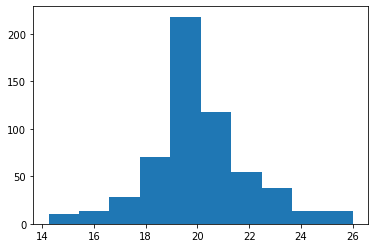

In [10]:
x = poke["score"]
plt.hist(x)
print("Overall our best score is", str(min(x)), " and our worst score is ", str(max(x)))

In [11]:
#list the pokemon with the highest score
print(poke[poke["score"] == 14.25]["Name"])

185                Mawile
418                Klefki
484              Magearna
568    Zacian Crown Sword
Name: Name, dtype: object


All of the above pokemon have have the type combination of steel and fairy. This is an impressive combination because defensively steel is strong against normal, grass, ice, flying, psychic, bug, rock, ghost, dragon, dark, steel, and fairy. When fairy is added to this type combination it negates steel's weakness against fighing and increases it's strength against bug, dark and dragon. This leaves only weeknesses to ground and fire.

In [12]:
#list the pokemon with the lowest score
print(poke[poke["score"] == 26]["Name"])

245       Snover
246    Abomasnow
Name: Name, dtype: object


The above two pokemon have have the type combination of grass and ice. Although, grass is defensively strong against water, grass, elecctric, and ground, it is weak against fire, ice, poison, flying, and bug. Additionally, when ice is added to the equation the weakness increase to fighting, rock, and steel. It also has a double weaakness to fire.

# Cluster Analysis

In the above analysis we found which pokemon types are the strongest and weakest. Let's go a bit further to see which type combinations are most similar to each other by using a cluster analysis. This way we can better understand we want to choose when forming our team.

## K-Means Clustering

In [13]:
#let's do a cluster analysis on each pokemon

kmeans = KMeans(
    init="random",
    n_clusters=8,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(poke[poke_type_columns])

KMeans(init='random', random_state=42)

In [14]:
#analyze the output
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
print(kmeans.n_iter_)

# first 5 predicted labels
print(kmeans.labels_[:5])

1958.0089918270473
5
[0 0 0 1 1]


Below I'll use the Elbow Method to find the optimal number of Clusters

In [15]:
# here we can use the elbow method to find the optimal number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
# Python’s dictionary unpacking operator (**)
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(poke[poke_type_columns])
    sse.append(kmeans.inertia_)

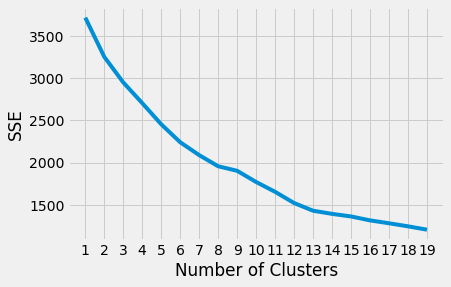

In [16]:
 plt.style.use("fivethirtyeight") 
 plt.plot(range(1, 20), sse) 
 plt.xticks(range(1, 20))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

Below I will compare the Elbow Method to the Silhouette Method for finding the optimal number of clusters

In [17]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
scaled_features = poke[poke_type_columns]

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

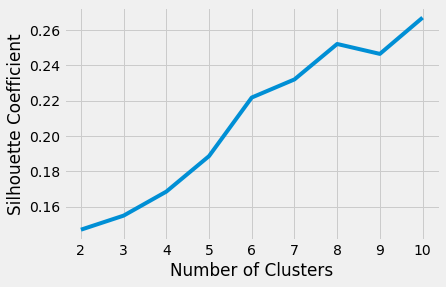

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Hierarchical clustering

In [19]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale

In [20]:
#Configure the output
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams["figure.figsize"] =20,10

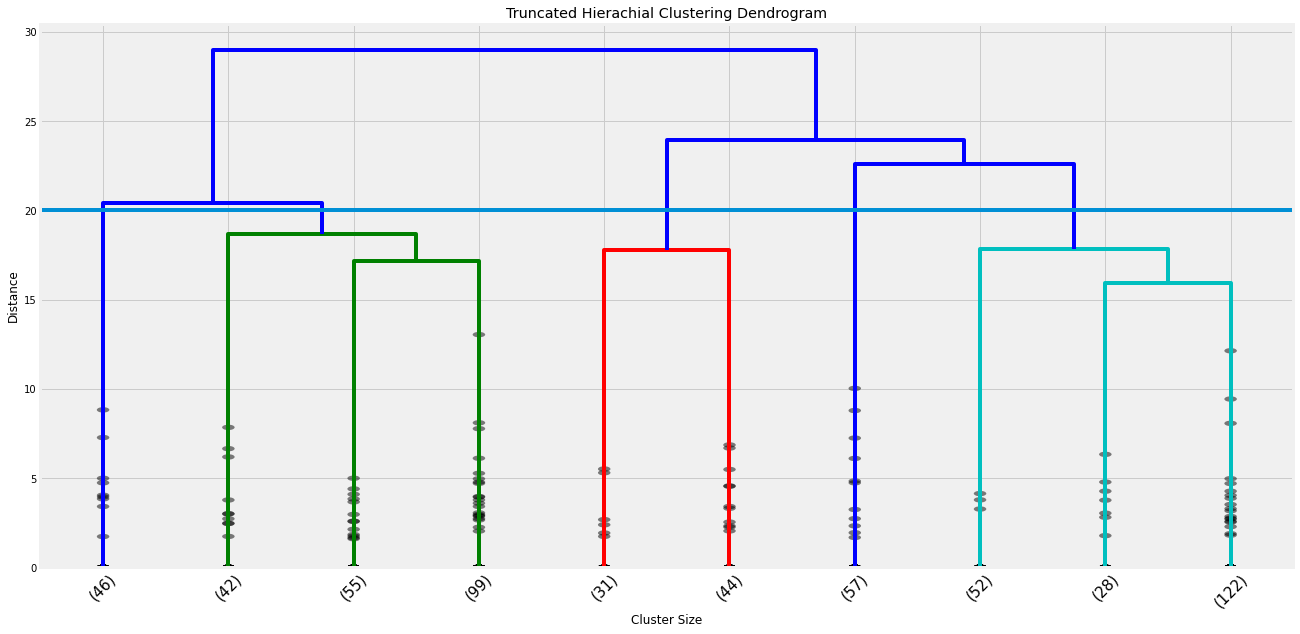

In [21]:
z = linkage(scaled_features,"ward")

#generate dendrogram
dendrogram(z,truncate_mode= "lastp", p =10, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Truncated Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=20)
plt.show()

## Analyzing Clusters

Going further I went with the heirarichal clustering results and chose to go with 5 clusters. I did this because a trainer is able to choose 6 pokemon for their team. Therefore the cluster analysis can help us choose 5 pokemon with disjoint type combinations and one extra to be chosen by the trainer.

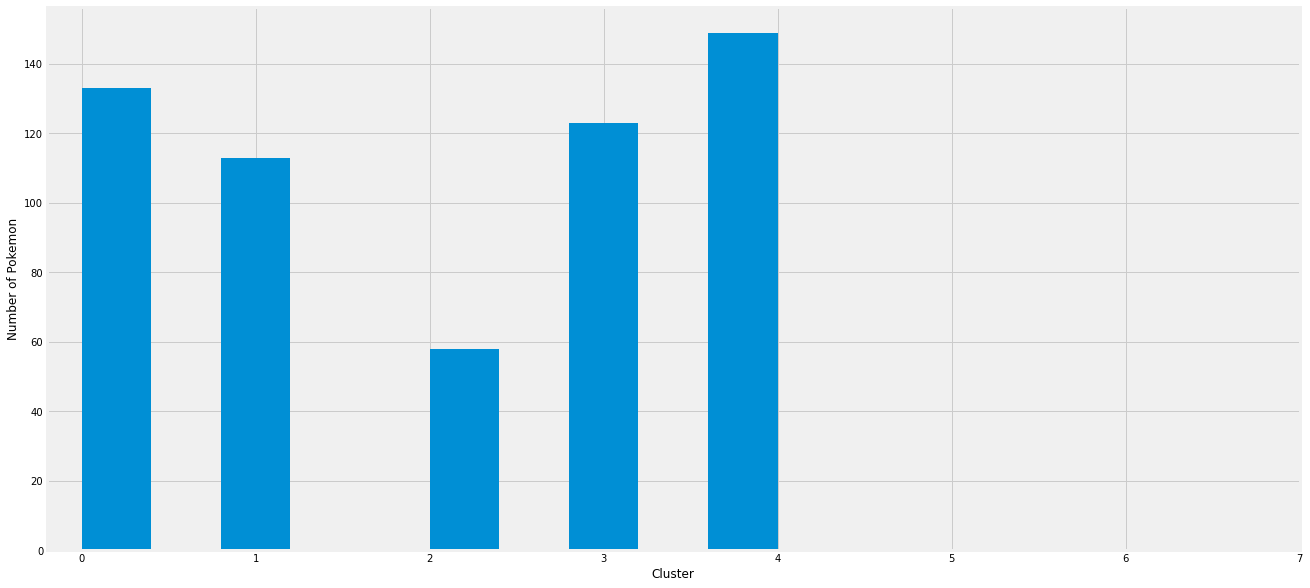

In [22]:
#let's do a cluster analysis on each pokemon

kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(poke[poke_type_columns])

# attach predicted labels to our dataset
poke["clusters"] = kmeans.labels_

#histogram of clusters
x = poke["clusters"]
plt.hist(x)

plt.style.use("fivethirtyeight") 
plt.xticks(range(0, 8))
plt.xlabel("Cluster")
plt.ylabel("Number of Pokemon")
plt.show()

Now that we've assigned each pokemon to a cluster let's find the weaknesses and strengths of each cluster

In [23]:
grid = []
for j in poke_type_columns:
    typ = []
    for i in range(0,5):
        typ.append(poke[poke["clusters"] == i][j].mean())
    grid.append(typ)

In [24]:
grid1 = pd.DataFrame(grid)
grid2 = grid1.transpose()
grid2.columns = poke_type_columns
# grid2["clusters"] = [1,2,3,4,5,6,7,8]
print(grid2)

     Normal      Fire     Water  Electric     Grass       Ice  Fighting  \
0  0.902256  1.661654  0.813910  0.986842  0.486842  1.733083  0.584586   
1  0.712389  1.367257  1.323009  0.827434  0.584071  0.719027  1.216814   
2  0.732759  0.810345  2.051724  0.224138  2.413793  1.672414  1.327586   
3  0.861789  0.691057  0.686992  1.727642  1.593496  0.689024  0.747967   
4  0.989933  1.070470  0.942953  0.939597  0.926174  1.083893  1.567114   

     Poison    Ground    Flying   Psychic       Bug      Rock     Ghost  \
0  1.398496  0.503759  1.676692  1.063910  1.139098  1.725564  1.172932   
1  0.497788  2.115044  0.743363  0.938053  0.584071  1.128319  1.106195   
2  0.448276  1.344828  0.836207  0.913793  1.077586  0.629310  1.120690   
3  0.926829  1.048780  1.040650  0.914634  1.154472  1.085366  1.386179   
4  1.151007  0.996644  1.224832  0.966443  1.080537  1.046980  0.573826   

     Dragon      Dark     Steel     Fairy  
0  0.954887  1.146617  1.109023  1.007519  
1  0.80973

In [25]:
pts = []
for i in range(0,5):
    df = pd.DataFrame(grid2)
    pts.append(df.iloc[i, :])

### Cluster 1

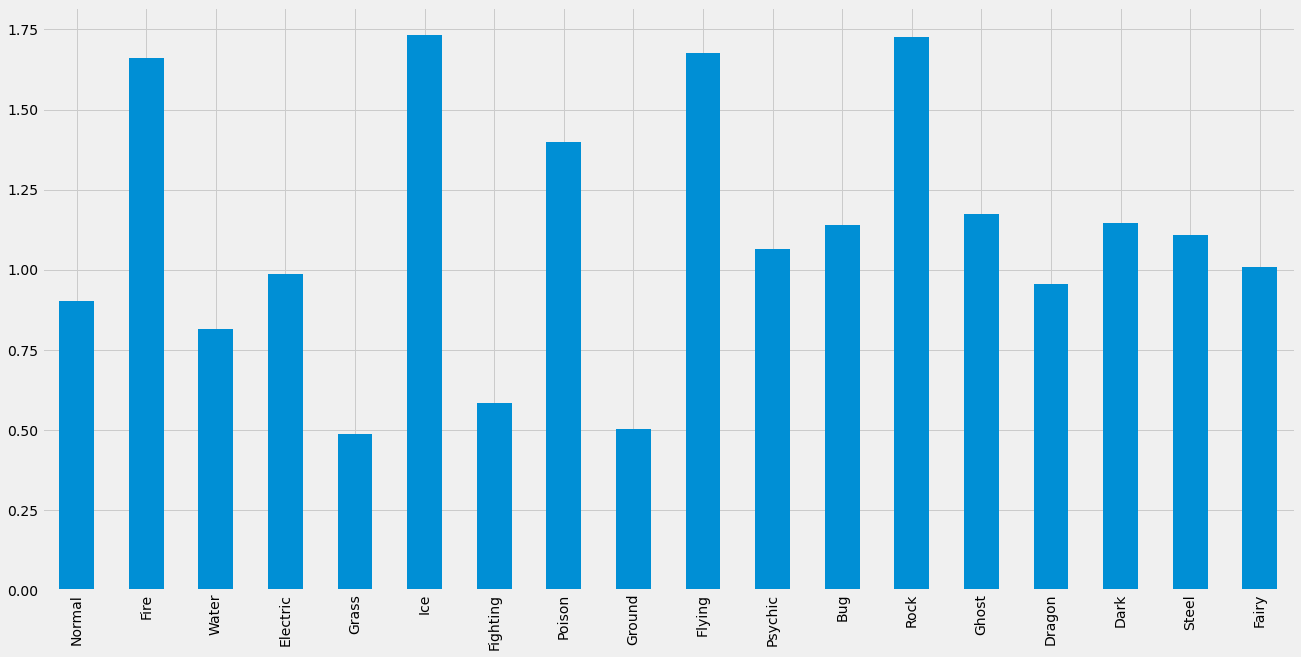

In [26]:
pts[0].plot(y=poke_type_columns, kind="bar")

From the above output we see that this cluster is weak against fire, ice, flying, and rock and strong against grass, fighting, and ground. This cluster consists of the type of pokemon that are grass, flying, fairy or some combination of the 3. Some pokemon in this cluster include Butterfree, Exeggutor, Mr. Mime, Pinser, and even Charizard. 

In [27]:
#run to see 30 pokemon in this cluster
print(poke[poke["clusters"]==0]["Name"].head(30))

0                   Bulbasaur
1                     Ivysaur
2                    Venusaur
5                   Charizard
9                    Caterpie
10                    Metapod
11                 Butterfree
27                     Oddish
28                      Gloom
29                  Vileplume
57     Rapidash Galarian Form
64                 Farfetch'd
74                  Exeggcute
75                  Exeggutor
76       Exeggutor Alola Form
89                    Tangela
97                    Mr.Mime
98      Mr.Mime Galarian Form
99                    Scyther
100                    Pinsir
114                  Hoothoot
115                   Noctowl
122                   Togetic
123                      Natu
124                      Xatu
125                 Bellossom
141                 Heracross
149                  Delibird
161                    Celebi
166                     Lotad
Name: Name, dtype: object


### Cluster 2

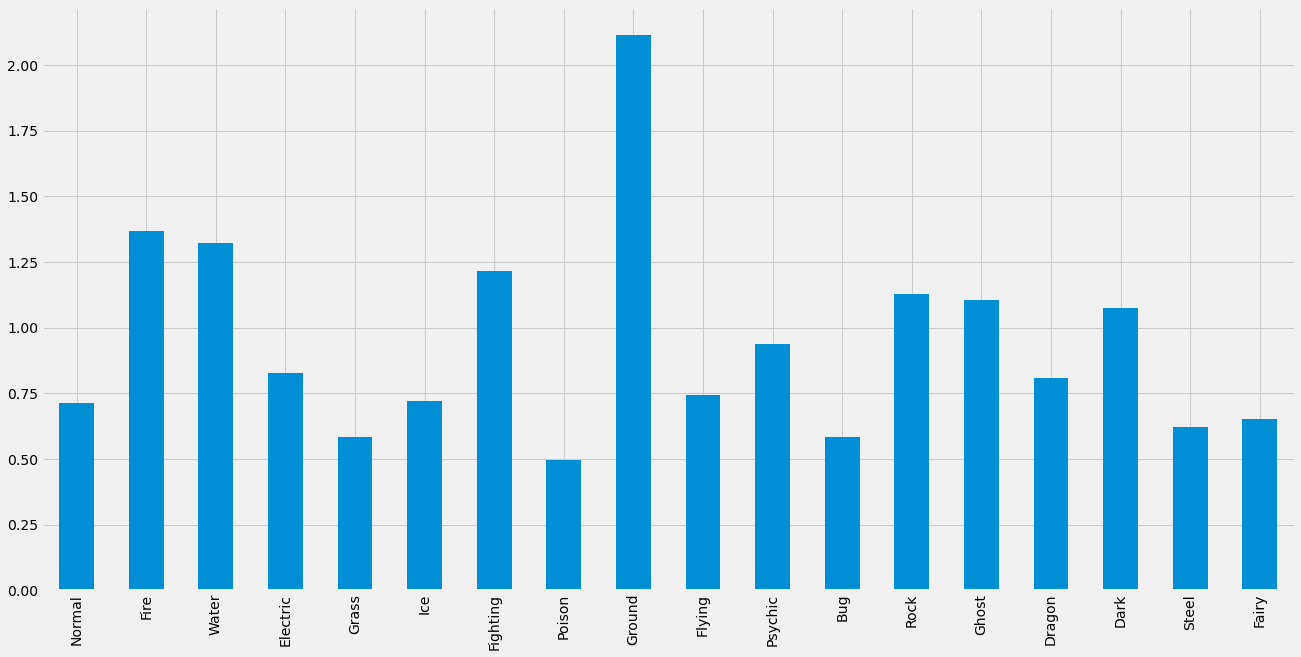

In [28]:
pts[1].plot(y=poke_type_columns, kind="bar")

From the above output we see that this cluster is moderately weak against fire, water, fighting and very weak against ground. This cluster is strong against grass, poison, and bug. This cluster consists of the type of pokemon that are fire, electric, poison, or steel which explains the strong weakness to ground type attacks. Some pokemon in this cluster include Ninetails, Joltion, gastly, and Magnemite.

In [29]:
#run to see 30 pokemon in this cluster
print(poke[poke["clusters"]==1]["Name"].head(30))

3                 Charmander
4                 Charmeleon
12                   Pikachu
13                    Raichu
16      Sandshrew Alola Form
18      Sandslash Alola Form
21                    Vulpix
23                 Ninetales
31        Diglett Alola Form
33        Dugtrio Alola Form
36      Meowth Galarian Form
41                 Growlithe
42                  Arcanine
54                    Ponyta
56                  Rapidash
61     Slowbro Galarian Form
62                 Magnemite
63                  Magneton
68                    Gastly
69                   Haunter
70                    Gengar
79        Marowak Alola Form
83                   Koffing
84                   Weezing
85     Weezing Galarian Form
108                  Jolteon
109                  Flareon
118                    Pichu
137                  Steelix
139                   Scizor
Name: Name, dtype: object


### Cluster 3

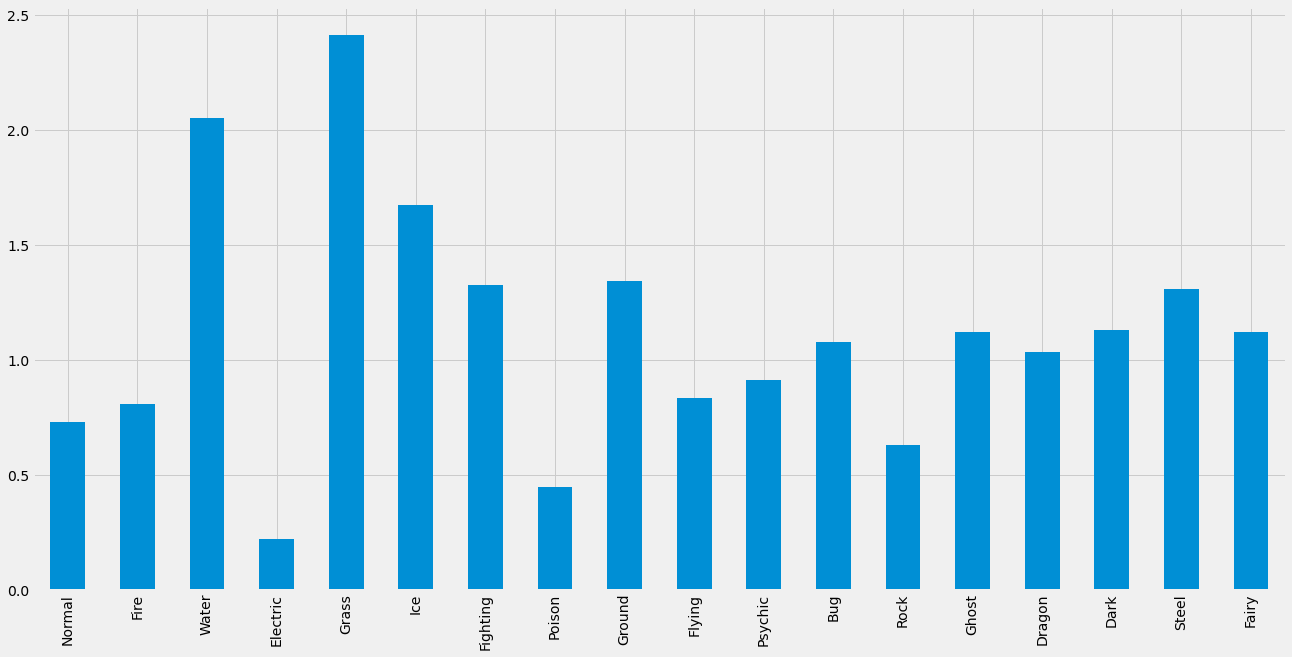

In [30]:
pts[2].plot(y=poke_type_columns, kind="bar")

From the above output we see that this cluster is moderately weak against ice, ground, fighting, very weak against water and extremely weak against grass. This cluster is strong against poison, and rock and extremely strong against electric. This cluster consists of the type of mostly pokemon that are ground and rock which explains the strong weakness to grass type attacks and strong defense to electric. Some pokemon in this cluster include Diglett, Cubone, Tyranitar, and Rydon.

In [31]:
#run to see 30 pokemon in this cluster
print(poke[poke["clusters"]==2]["Name"].head(30))

15      Sandshrew
17      Sandslash
30        Diglett
32        Dugtrio
71           Onix
77         Cubone
78        Marowak
86        Rhyhorn
87         Rhydon
128     Sudowoodo
130        Wooper
131      Quagsire
143        Swinub
144     Piloswine
158      Larvitar
159       Pupitar
160     Tyranitar
194      Trapinch
195       Vibrava
196        Flygon
197      Lunatone
198       Solrock
199      Barboach
200      Whiscash
203        Baltoy
204       Claydol
223     Gastrodon
232        Bonsly
238    Hippopotas
239     Hippowdon
Name: Name, dtype: object


### Cluster 4

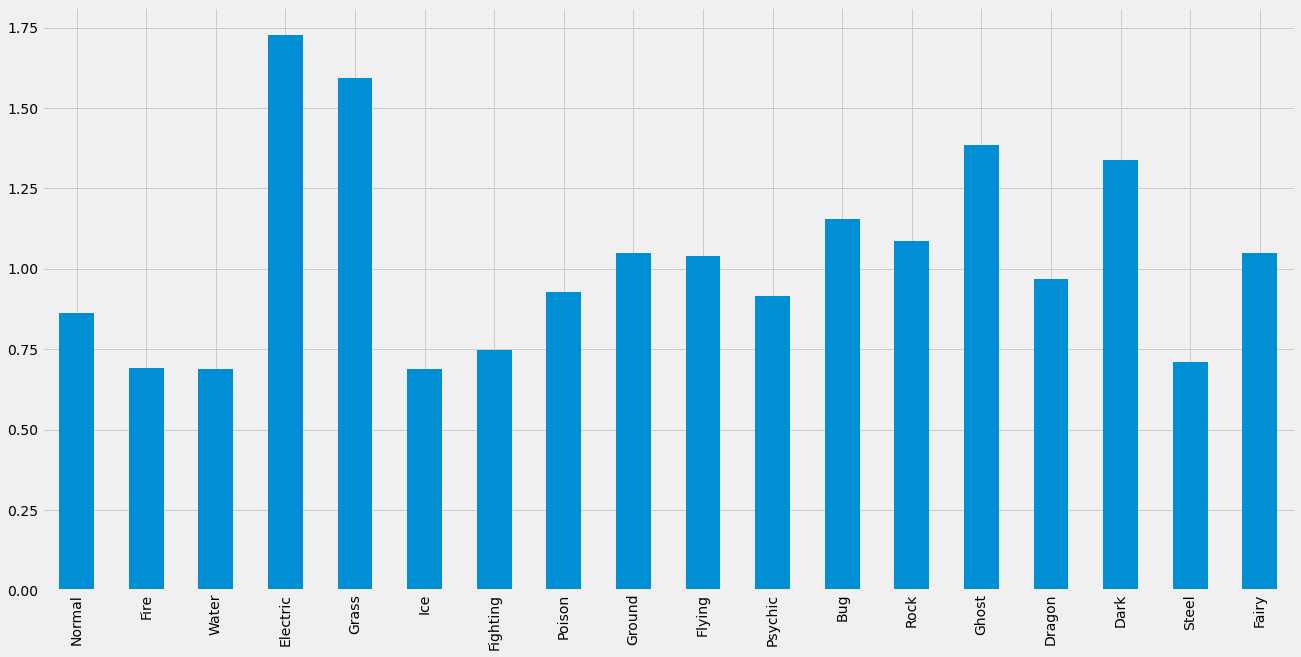

In [32]:
pts[3].plot(y=poke_type_columns, kind="bar")

From the above output we see that this cluster is weak against electric, grass, ghost, and dark. This cluster is strong against fire, water, ice, and steel. This cluster consists of the type of pokemon that are water and psychic type. Some pokemon in this cluster include Abra, Wartortle, Slowpoke, Mew, and Kingler.

In [33]:
#run to see 30 pokemon in this cluster
print(poke[poke["clusters"]==3]["Name"].head(30))

6                    Squirtle
7                   Wartortle
8                   Blastoise
14          Raichu Alola Form
39                    Psyduck
40                    Golduck
43                    Poliwag
44                  Poliwhirl
45                  Poliwrath
46                       Abra
47                    Kadabra
48                   Alakazam
52                  Tentacool
53                 Tentacruel
55       Ponyta Galarian Form
58                   Slowpoke
59     Slowpoke Galarian Form
60                    Slowbro
66                   Shellder
67                   Cloyster
72                     Krabby
73                    Kingler
91                     Horsea
92                     Seadra
93                    Goldeen
94                    Seaking
95                     Staryu
96                    Starmie
102                  Magikarp
103                  Gyarados
Name: Name, dtype: object


### Cluster 5

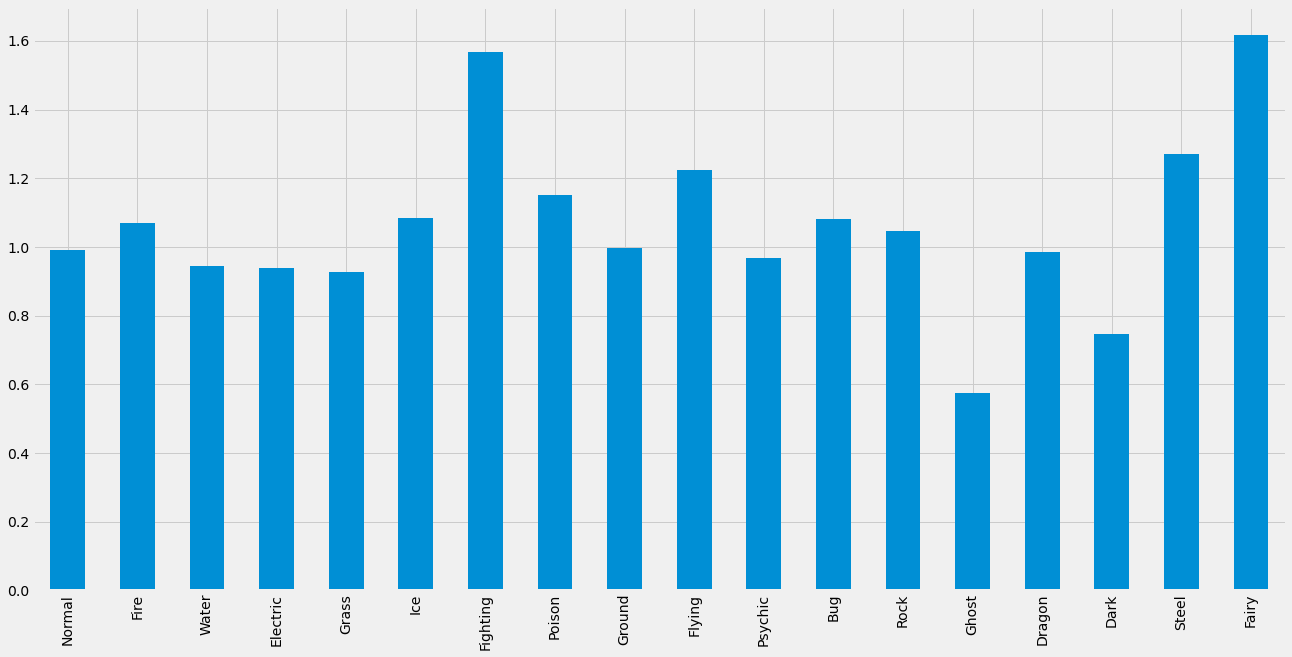

In [34]:
pts[4].plot(y=poke_type_columns, kind="bar")

From the above output we see that this cluster is weak against electric, grass, ghost, and dark. This cluster is strong against fire, water, ice, and steel. This cluster consists of the type of pokemon that are water and psychic type. Some pokemon in this cluster include Abra, Wartortle, Slowpoke, Mew, and Kingler.

In [35]:
#run to see 30 pokemon in this cluster
print(poke[poke["clusters"]==3]["Name"].head(30))

6                    Squirtle
7                   Wartortle
8                   Blastoise
14          Raichu Alola Form
39                    Psyduck
40                    Golduck
43                    Poliwag
44                  Poliwhirl
45                  Poliwrath
46                       Abra
47                    Kadabra
48                   Alakazam
52                  Tentacool
53                 Tentacruel
55       Ponyta Galarian Form
58                   Slowpoke
59     Slowpoke Galarian Form
60                    Slowbro
66                   Shellder
67                   Cloyster
72                     Krabby
73                    Kingler
91                     Horsea
92                     Seadra
93                    Goldeen
94                    Seaking
95                     Staryu
96                    Starmie
102                  Magikarp
103                  Gyarados
Name: Name, dtype: object


# Conclusion

In conclusion we used the pokemon dataset to get better understanding of pokemon tpes and their combinations. I first calculated an aggregate score from the type matchup scores to find the weakest and strongest pokemon type combinations. Then I used a K-Means cluster analysis to group like-type combinations to better understand which types are most similar and to help us choose a pokemon team. 